In [1]:
import pandas as pd
import numpy as np
import random as rnd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
train_df = pd.read_csv('train_sdgp.csv')
test_df = pd.read_csv('test_sdgp.csv')
combine = [train_df, test_df]

In [5]:
print(train_df.columns.values)

['Suicide' 'Age' 'Gender' 'Religon' 'Race' 'Occupation' 'Civil Status'
 'Education Level' 'Reason' 'Lifetime Psychiatric Hospitalizations'
 'Past Suicide Attempts' 'Any suicidal thoughts mentioned'
 'Self-Injurious Behaviour' 'Psychiatric Disorders' 'Past Illnesses '
 'Alcohol/ drug Consumption' 'Anger' 'Sleep Problem' 'Social Iscolation'
 'Sad/ Weary' 'Humilated']


In [6]:
train_df.head()


,Suicide,Age,Gender,Religon,Race,Occupation,Civil Status,Education Level,Reason,Lifetime Psychiatric Hospitalizations,...,Any suicidal thoughts mentioned,Self-Injurious Behaviour,Psychiatric Disorders,Past Illnesses,Alcohol/ drug Consumption,Anger,Sleep Problem,Social Iscolation,Sad/ Weary,Humilated
0,0,30,F,Buddhist,Sinhalese,Administrative Executive Managerial & related ...,Unmarried,From Grade 1 to 7,Asthma,0,...,0,0,None,Asthma,None,0,0,0,0,0
1,0,91,F,Islam,Muslim,Sales worker,Married,University Degree or above,Alzheimer's disease,0,...,0,0,None,Other,None,0,1,0,0,0
2,0,85,M,Buddhist,Sinhalese,Security Personnel,Married,University Degree or above,Stroke/Chronic diseases & Physical disabilities,0,...,0,0,None,Diabetes,None,0,1,0,0,0
3,1,87,M,Buddhist,Sinhalese,Unemployed persons,Married,School not attended,Harrasment by the husband & family disputes,0,...,1,0,None,Chronic pain,Frequent,1,1,1,1,1
4,0,59,F,Buddhist,Sinhalese,Pensioners,Unmarried,Other,Alzheimer's disease,0,...,0,0,None,COPD,None,0,1,0,1,1


In [7]:
train_df.tail()

,Suicide,Age,Gender,Religon,Race,Occupation,Civil Status,Education Level,Reason,Lifetime Psychiatric Hospitalizations,...,Any suicidal thoughts mentioned,Self-Injurious Behaviour,Psychiatric Disorders,Past Illnesses,Alcohol/ drug Consumption,Anger,Sleep Problem,Social Iscolation,Sad/ Weary,Humilated
694,0,59,F,Buddhist,Sinhalese,Clerical & related workers (Stenographers/ Typ...,Married,Other,Natural Death,0,...,0,0,None,Kidney Disease,None,0,0,0,0,0
695,1,39,M,Buddhist,Sinhalese,Agricultural Animal Husbandry Fisherman & rela...,Married,Passed G.C.E (O/L),Loss of property,0,...,1,0,Depression,Other,Frequent,0,0,0,1,0
696,1,32,M,Buddhist,Sinhalese,Clerical & related workers (Stenographers/ Typ...,Married,Passed G.C.E (O/L),Harrasment by the husband & family disputes,0,...,0,1,None,Diabetes,Moderate,0,0,0,0,0
697,0,76,F,Christian,Burger,Clerical & related workers (Stenographers/ Typ...,Married,University Degree or above,Ischemic heart disease,0,...,0,0,None,Heart Diseases,None,0,1,0,0,0
698,1,22,M,Buddhist,Sinhalese,Production process workers Craftsman & related...,Unmarried,Passed G.C.E (O/L),Other Reasons,0,...,0,1,None,COPD,Moderate,0,0,0,1,0


In [8]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 21 columns):
Suicide                                  699 non-null int64
Age                                      699 non-null int64
Gender                                   699 non-null object
Religon                                  699 non-null object
Race                                     699 non-null object
Occupation                               699 non-null object
Civil Status                             699 non-null object
Education Level                          699 non-null object
Reason                                   699 non-null object
Lifetime Psychiatric Hospitalizations    699 non-null int64
Past Suicide Attempts                    699 non-null int64
Any suicidal thoughts mentioned          699 non-null int64
Self-Injurious Behaviour                 699 non-null int64
Psychiatric Disorders                    699 non-null object
Past Illnesses                           699 no

In [9]:
train_df.describe()

,Suicide,Age,Lifetime Psychiatric Hospitalizations,Past Suicide Attempts,Any suicidal thoughts mentioned,Self-Injurious Behaviour,Anger,Sleep Problem,Social Iscolation,Sad/ Weary,Humilated
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.00000,699.000000,699.000000,699.000000,699.000000
mean,0.502146,55.005722,0.194564,0.203147,0.296137,0.217454,0.32618,0.606581,0.353362,0.371960,0.264664
std,0.500353,22.474053,0.396148,0.402629,0.456879,0.412809,0.46915,0.488858,0.478356,0.483674,0.441470
min,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,73.000000,0.000000,0.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000
max,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [10]:
train_df.describe(include=['O'])

,Gender,Religon,Race,Occupation,Civil Status,Education Level,Reason,Psychiatric Disorders,Past Illnesses,Alcohol/ drug Consumption
count,699,699,699,699,699,699,699,699,699,699
unique,2,5,5,15,4,7,25,8,11,3
top,M,Buddhist,Sinhalese,Unemployed persons,Married,Passed Grade 8,Natural Death,None,Other,None
freq,407,425,445,164,313,164,123,482,158,492


In [11]:
train_df[['Gender', 'Suicide']].groupby(['Gender'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Gender,Suicide
1,M,0.724816
0,F,0.191781


In [12]:
train_df[['Race', 'Suicide']].groupby(['Race'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Race,Suicide
3,Sinhalese,0.752809
4,Tamil,0.168539
1,Muslim,0.033333
0,Burger,0.000000
2,Other,0.000000


In [13]:
train_df[['Occupation', 'Suicide']].groupby(['Occupation'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Occupation,Suicide
14,professional Technical & related workers (Doct...,1.000000
12,Unemployed persons,0.878049
1,Agricultural Animal Husbandry Fisherman & rela...,0.871795
10,Service workers (Cooks/Tailors/Barbers/ etc),0.676471
11,Student,0.653846
13,Workers not classfied by occupation,0.633333
7,Professional Technical & related workers (Doct...,0.578947
6,Production process workers Craftsman & related...,0.540541
8,Sales worker,0.270270
2,Armed Services,0.225806


In [14]:
train_df[['Civil Status', 'Suicide']].groupby(['Civil Status'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Civil Status,Suicide
1,Married,0.766773
2,Unmarried,0.497696
3,Widow,0.020202
0,Divourced,0.014286


In [15]:
train_df[['Education Level', 'Suicide']].groupby(['Education Level'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Education Level,Suicide
3,Passed G.C.E (O/L),0.755556
4,Passed Grade 8,0.737805
0,From Grade 1 to 7,0.652174
5,School not attended,0.283019
1,Other,0.150943
2,Passed G.C.E (A/L),0.148148
6,University Degree or above,0.040000


In [16]:
train_df[['Reason', 'Suicide']].groupby(['Reason'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Reason,Suicide
12,Ill-treatment by the children,1.000000
10,Failure at the examination,1.000000
20,REASON NOT MENTIONED,1.000000
19,Problems caused with the elders,1.000000
4,Chronic diseases & Physical disabilities,1.000000
15,Loss of property,1.000000
1,Aggrieved over the death parents/relations,1.000000
8,Economic problems (Poverty indebtedness),1.000000
9,Employment problems,1.000000
11,Harrasment by the husband & family disputes,0.985915


In [17]:
train_df[['Lifetime Psychiatric Hospitalizations', 'Suicide']].groupby(['Lifetime Psychiatric Hospitalizations'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Lifetime Psychiatric Hospitalizations,Suicide
1,1,0.882353
0,0,0.410302


In [18]:
train_df[['Past Suicide Attempts', 'Suicide']].groupby(['Past Suicide Attempts'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Past Suicide Attempts,Suicide
0,0,0.517056
1,1,0.443662


In [19]:
train_df[['Any suicidal thoughts mentioned', 'Suicide']].groupby(['Any suicidal thoughts mentioned'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Any suicidal thoughts mentioned,Suicide
1,1,0.840580
0,0,0.359756


In [20]:
train_df[['Self-Injurious Behaviour', 'Suicide']].groupby(['Self-Injurious Behaviour'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Self-Injurious Behaviour,Suicide
1,1,0.868421
0,0,0.400366


In [21]:
train_df[['Psychiatric Disorders', 'Suicide']].groupby(['Psychiatric Disorders'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Psychiatric Disorders,Suicide
5,Other,1.000000
2,Depression,0.936937
1,Bipolar Disorder,0.882353
4,Other,0.823529
6,PTSD,0.818182
0,BPD,0.733333
7,Schizophrenia,0.705882
3,None,0.334025


In [22]:
train_df[['Past Illnesses ', 'Suicide']].groupby(['Past Illnesses '], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Past Illnesses,Suicide
2,Cancer,1.000000
5,HIV/AIDS,0.928571
8,Other,0.746835
1,COPD,0.611111
3,Chronic pain,0.543478
10,none,0.537879
4,Diabetes,0.533333
7,Kidney Disease,0.447368
6,Heart Diseases,0.340426
0,Asthma,0.212121


In [23]:
train_df[['Alcohol/ drug Consumption', 'Suicide']].groupby(['Alcohol/ drug Consumption'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Alcohol/ drug Consumption,Suicide
1,Moderate,0.869565
0,Frequent,0.843478
2,None,0.353659


In [24]:
train_df[['Anger', 'Suicide']].groupby(['Anger'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Anger,Suicide
1,1,0.811404
0,0,0.352442


In [25]:
train_df[['Sleep Problem', 'Suicide']].groupby(['Sleep Problem'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Sleep Problem,Suicide
1,1,0.674528
0,0,0.236364


In [26]:
train_df[['Social Iscolation', 'Suicide']].groupby(['Social Iscolation'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Social Iscolation,Suicide
1,1,0.821862
0,0,0.327434


In [27]:
train_df[['Sad/ Weary', 'Suicide']].groupby(['Sad/ Weary'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Sad/ Weary,Suicide
1,1,0.900000
0,0,0.266515


In [28]:
train_df[['Humilated', 'Suicide']].groupby(['Humilated'], as_index=False).mean().sort_values(by='Suicide', ascending=False)

,Humilated,Suicide
1,1,0.881081
0,0,0.365759


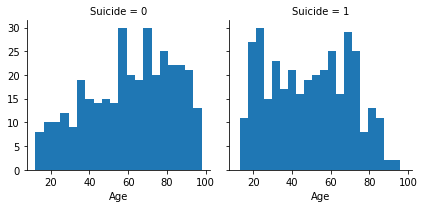

In [29]:
gr = sns.FacetGrid(train_df, col='Suicide')
gr.map(plt.hist, 'Age', bins=20)

In [30]:
grid = sns.FacetGrid(train_df, col='Suicide', row='Race', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

TypeError: __init__() got an unexpected keyword argument 'height'

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


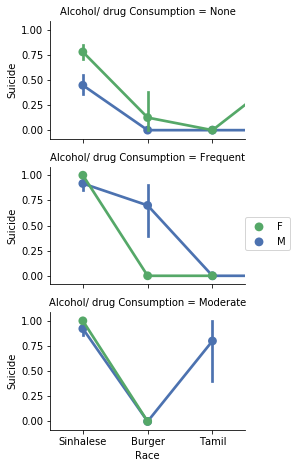

In [31]:
grid = sns.FacetGrid(train_df, row='Alcohol/ drug Consumption', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Race', 'Suicide', 'Gender', palette='deep')
grid.add_legend()

In [32]:
from sklearn import preprocessing

In [33]:
category_col =['Gender','Religon', 'Race', 'Occupation' ,
           'Civil Status' ,'Education Level' ,'Reason' ,
           'Psychiatric Disorders' ,'Past Illnesses ' ,'Alcohol/ drug Consumption'] 
labelEncoder = preprocessing.LabelEncoder()
mapping_dict={}
for col in category_col:
    train_df[col] = labelEncoder.fit_transform( train_df[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
print( train_df.head(20))

    Suicide  Age  Gender  Religon  Race  Occupation  Civil Status  \
0         0   30       0        0     3           0             2   
1         0   91       0        3     1           8             1   
2         0   85       1        0     3           9             1   
3         1   87       1        0     3          12             1   
4         0   59       0        0     3           4             2   
5         1   31       1        0     3           1             2   
6         0   75       0        1     0           2             0   
7         1   47       1        0     3          12             1   
8         0   58       0        1     0           2             2   
9         0   36       0        2     4           2             3   
10        1   87       1        0     3          12             1   
11        0   73       0        1     0           3             3   
12        1   44       1        0     3           1             1   
13        1   62       1        0 

In [34]:
# dropping passed columns 
#train_df.drop(["Year","Race", "Lifetime Psychiatric Hospitalizations","Past Illnesses ","Social Iscolation","Sad/ Weary","Humilated"], axis = 1, inplace = True) 
  
# display 
#train_df
# dropping passed columns 
#train_df.drop(["Year","Race", "Lifetime Psychiatric Hospitalizations","Past Illnesses ","Social Iscolation","Sad/ Weary","Humilated"], axis = 1, inplace = True) 
  
# display 
#train_df

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
#Splitting out training data into X: features and y: target
X = train_df.values[:, 1:20]
y = train_df.values[:,20]


#splitting our training data again in train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=100,shuffle=True)


# Linear VM

In [37]:
from sklearn.svm import SVC, LinearSVC

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print (acc_linear_svc)

80.16


In [39]:
import pickle
#creating and training a model
#serializing our model to a file called model.pkl
pickle.dump(clf, open("model.pkl","wb"))

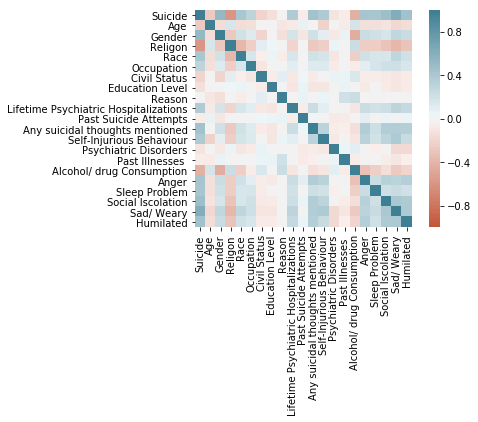

In [40]:

corr = train_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [42]:
print(clf.predict([[87,1,1,1,12,1,5,6,0,0,0,3,2,0,1,1,0,0,0]]))

[0]


In [43]:
print(clf.predict([[30,1,0,0,11,2,16,1,1,1,1,1,3,2,1,1,1,1,1]]))

[1]


In [44]:
print(clf.predict([[40,1,0,0,11,2,16,0,0,1,0,1,3,2,0,1,0,1,1]]))

[0]


In [45]:
print(clf.predict([[59,0,0,3,4,2,1,2,0,0,0,3,1,2,0,1,0,1,1]]))

[1]


In [46]:
print(clf.predict([[59,0,0,3,4,2,1,2,0,0,0,3,1,10,0,1,0,0,0]]))

[1]
